In [69]:
import numpy as np
import krwordrank
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
from pykospacing import spacing

데이터 주소

In [193]:
data_path = 'E:\\crawling_1sentence\\11_@math9772.txt'

데이터 전처리(.을 기준으로 한문장으로 인식후 자동 띄어쓰기 처리)

In [212]:
def get_texts(data_path):
    file = open(data_path, 'r',encoding='UTF-8')
    data =file.readlines()
    data_list = []
    for sentence in data:
        list_sentence1 = sentence.replace('\n','').replace('""','').split('.')
        for list_sentence2 in list_sentence1:
            list_sentence = list_sentence2.replace('\n','').split('?')
            for lines in list_sentence:
                line = spacing(lines).strip()
                data_list.append(line)
    ex_list = list(set(data_list))
    ex_list.remove('')
    return ex_list
texts = get_texts(data_path)

In [213]:
print(texts)

['근데 좀 멋있다', '해장은 분명하고 왔을 터니 이렇게 속이 좋은 거겠지 휴대폰 배터리를 교체하고 친구에게 전화를 걸었다', '우리 민경이 도 따스한 두 손으로 내 등을 감싸준다', '옛날에 태어나 만났더라면 벌써 누구 하나 죽었을 수도 있었을 것이다', '커피는 고독의 시간을 길게 해줄 뿐이라고', '미친놈', '아니나 다를까 난 이내 취했지만 그건 술 때문이 아니었다', '내가 사랑을 주지 않아서인가 받는 게 무지해져서 인가 술을 마시면서 생각하는 건 어쨌든 민경이는 내 여자 고 내가 지켜야 한다는 거근 데 우리 둘은 내가 소주잔을 부딪히는 것만큼 많이 싸운다', '하긴 "그때 친구한테 전화가 왔다', '그러고 나는 민경이 가 아닌 내 생활을 생각했다', '쉽게 얻을 수 있고 또 양도 많아서 취하기도 딱 좋다', '귀찮으니 일단 스킨만 바르기로 하자 다행히 설거지 거리는 없다', '푸석한 머리를 손 짓으로 쓸어 올리고 냉수 한 컵에 기지개를 펴니 어느 정도 정신이 든다', '어 근데 왜 문자에 10만 원이 긁혔다고 적혀 있냐 쐈겠지 아니야 인마 2차는 내가 냈으니깐 짝짜꿍이 다 아오 얼마를 쓴 거지근데 오늘 무슨 요일이냐 몰라 네가 봐 새꺄 "피자 헛에서 받은 캘린더 쪽으로 고개를 돌리니 오늘은 토요일이다', '안돼 데드라인 얼마 안 남아서 바빠에 언젠데', '일단 샤워를 하기로 했다', '오늘 이렇게 내가 사랑하는 여자와 마시는 술 한 잔은 너무나도 달다', '무지라는 맛있는 술은 정말 사람을 편하게 해주며 심지어 가격도 싸다', '그렇게 나는 민경이 의 집으로 갔다', '--작업 중입니다-- 응 전화해 다 하고 ㅋㅋ-나는 지금 이 대화가 어색하지 않다', '그렇게 나는 긴 숙취 상태에서 깨어났다', '"튕겼다', '근데 티비도 눈에 들어오지 않고 게임도 재미가 없다', '그때 아마 내가 술에서 깬 거 아닐까', '뭐 야 갑자기~방금 정신 차렸어', '아무래도 배게에 진드기가 많나 보다 양볼이 푸석해 서둘러 수제 비누로 세수를 했다', '나 그동안 뭐

krwordrank로 문장요약, 키워드 추출

In [214]:
from krwordrank.sentence import summarize_with_sentences
penalty = lambda x:0 if (8 <= len(x) <= 85) else 1
stopwords = {'오늘'}
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.7,
    num_keywords=10,
    num_keysents=1,
    scaling=lambda x:1,
    verbose=False,
    min_count = 1
)
keyword = []

for sent in sents:
    print(sent)
for i in keywords:
    keyword.append(i)
print(keyword)

그래 내가 취해야 할 건 바로 이 여자의 냄새 고 사랑인데"친구가 너보고 보살이래 이 정도면 득도지네가 딱딱해지는 게 느껴지니깐 미치겠더라
['내가', '나는', '민경', '그래', '우리', '얼른', '아니', '--아주', '보고', '비긴']


워드 클라우드

In [210]:
def daily_wordcloud(data_path):
        f = open(data_path, 'r',encoding='UTF8')
        data = f.read()
        
        engine = Okt() 
        nouns1 = engine.nouns(data)
        nouns1 = [n for n in nouns1 if len(n) > 1]

        # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
        count = Counter(nouns1)
        tags = count.most_common(100)
        
        # 워드 클라우드 배경 사진
        #book_mask = np.array(Image.open('./img/1.png'))

        # WordCloud, matplotlib: 단어 구름 그리기
        font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
        wc = WordCloud(font_path=font_path, background_color='white', 
                       width=1000, height=1000, prefer_horizontal=0.8,
                      font_step=10)
        cloud = wc.generate_from_frequencies(dict(tags))
        plt.figure(figsize=(10,8))
        plt.axis('off')
        plt.imshow(cloud)

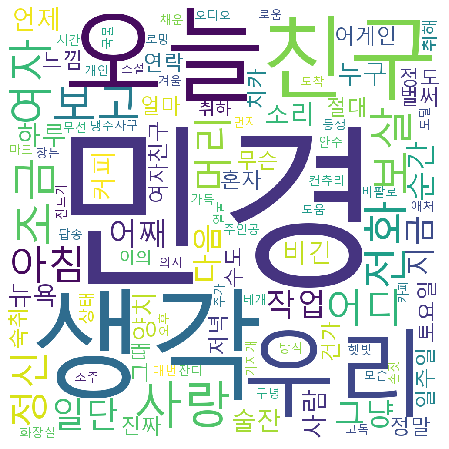

In [211]:
daily_wordcloud(data_path)